In [1]:
#pip install torch torchvision

In [2]:
import os
import torch
import torch.nn as nn 
from torch.autograd import Variable
from torch.utils.data import DataLoader
import torch.optim as opt
from torchvision import datasets, transforms, models
import torchvision
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
def get_data_set():

    transform_train = transforms.Compose([
                    transforms.Resize((224,224)), 
                    #transforms.AutoAugment(transforms.AutoAugmentPolicy.CIFAR10),
                    transforms.RandomCrop((224, 224)),
                    transforms.ColorJitter(brightness=0.5),
                    transforms.RandomRotation(10),
                    transforms.RandomHorizontalFlip(),
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    

    transform_test = transforms.Compose([
        transforms.Resize((224,224)), 
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    
    train = datasets.CIFAR10(root='../data', train=True, download=True, transform=transform_train)
    test = datasets.CIFAR10(root='../data', train=False, download=True, transform=transform_test)

    
    return train, test

train, test = get_data_set()

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


In [4]:
#沒有DataAugmentation
transform_train = transforms.Compose([
      transforms.Resize((224, 224)), 
      transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
train = datasets.CIFAR10(root='../data', train=True, download=True, transform=transform_train)

Files already downloaded and verified


In [5]:
BATCH_SIZE = 100 #原本為8

train_loader = DataLoader(train, batch_size= BATCH_SIZE, shuffle=True, num_workers= 0)
test_loader = DataLoader(test, batch_size= BATCH_SIZE, shuffle=False, num_workers= 0)


In [6]:
train_loader.dataset,test_loader.dataset


(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: ../data
     Split: Train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
                ToTensor()
                Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
            ), Dataset CIFAR10
     Number of datapoints: 10000
     Root location: ../data
     Split: Test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
                ToTensor()
                Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
            ))

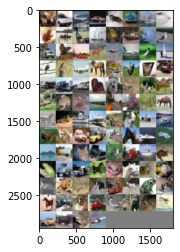

In [7]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

    
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

In [8]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [9]:
from torchvision import models
import torch.optim as opt
loss_fn=nn.CrossEntropyLoss()

In [10]:
transform_train = transforms.Compose([
        transforms.Resize((224,224)), 
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
train = datasets.CIFAR10(root='../data', train=True, download=True, transform=transform_train)
train_loader2 = DataLoader(train, batch_size= 100, shuffle=True, num_workers= 0)

Files already downloaded and verified


# VGG16 (在別的Colab)

# ResNet50

In [11]:
model_resnet50=models.resnet50(pretrained=True)
model_resnet50

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [12]:
for param in model_resnet50.parameters():
  param.requires_grad=False

In [13]:
model_resnet50.fc=nn.Sequential(
     nn.Linear(in_features=2048, out_features=1024, bias=True),
     nn.ReLU(inplace=True),
     nn.Dropout(p=0.5, inplace=False),
     nn.Linear(in_features=1024, out_features=256, bias=True),
     nn.ReLU(inplace=True),
     nn.Dropout(p=0.5, inplace=False),
     nn.Linear(in_features=256, out_features=10, bias=True),
)

In [14]:
model_resnet50=model_resnet50.cuda()

In [15]:
optimizerR=opt.Adam(model_resnet50.fc.parameters(),lr=0.001)
epochs = 10
lr_schedulerR = opt.lr_scheduler.ReduceLROnPlateau(optimizerR, factor=0.1, patience=3, verbose=True)

In [16]:
loss_list = [] #draw
accu_list = [] #draw
for epoch in range(1, epochs+1):
  total_loss=0.0
  total_correct=0
  batch_num = 0 #draw

  #調整一下lr
  # if epoch >= 5:
  #   optimizerR=opt.Adam(model_resnet50.fc.parameters(),lr=0.00001)
  # if epoch > 7:
  #   optimizerR=opt.Adam(model_resnet50.fc.parameters(),lr=0.000001)
  for batch, (images,labels) in enumerate(train_loader,1):#從1開始
    images=Variable(images.cuda())
    labels=Variable(labels.cuda())
    y_pred=model_resnet50(images)
    _,pred=torch.max(y_pred,1)
    optimizerR.zero_grad()
    loss=loss_fn(y_pred,labels)
  
    loss.backward()
    optimizerR.step()
    total_loss+=loss.data
    total_correct+=torch.sum(pred==labels.data)
    if batch%100==0:
      print("epoch:%d, batch:%d, loss:%.4f, accuracy:%.4f"%(epoch,batch,(total_loss/batch),(total_correct/batch)))
      #存一下loss畫圖
      loss_list.append(total_loss/batch) #draw
      accu_list.append(total_correct/batch) #draw
      batch_num += 1 #draw
      lr_schedulerR.step(total_loss/batch)  

epoch:1, batch:100, loss:1.3595, accuracy:51.2000
epoch:1, batch:200, loss:1.1271, accuracy:60.2750
epoch:1, batch:300, loss:1.0306, accuracy:64.0800
epoch:1, batch:400, loss:0.9735, accuracy:66.2250
epoch:1, batch:500, loss:0.9380, accuracy:67.5600
epoch:2, batch:100, loss:0.7454, accuracy:74.6000
epoch:2, batch:200, loss:0.7612, accuracy:74.3350
epoch:2, batch:300, loss:0.7606, accuracy:74.3533
epoch:2, batch:400, loss:0.7575, accuracy:74.5050
epoch:2, batch:500, loss:0.7536, accuracy:74.7020
Epoch 00010: reducing learning rate of group 0 to 1.0000e-04.
epoch:3, batch:100, loss:0.6626, accuracy:78.0400
epoch:3, batch:200, loss:0.6455, accuracy:78.5800
epoch:3, batch:300, loss:0.6340, accuracy:78.8000
epoch:3, batch:400, loss:0.6326, accuracy:78.9800
epoch:3, batch:500, loss:0.6320, accuracy:79.0040
epoch:4, batch:100, loss:0.6403, accuracy:78.5300
epoch:4, batch:200, loss:0.6309, accuracy:78.9300
epoch:4, batch:300, loss:0.6170, accuracy:79.4600
epoch:4, batch:400, loss:0.6160, accur

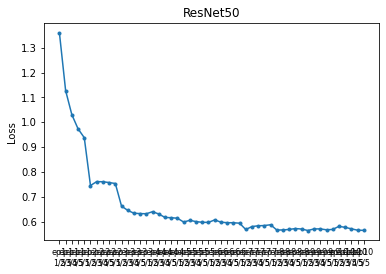

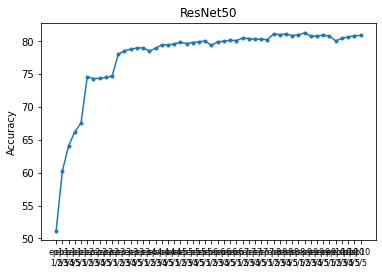

In [17]:
#如果圖畫出來很醜可以再自己調
def draw_resnet(num_list, epochs, batch_num, y_label):
  #num_list = [i.cpu() for i in num_list]
  x = range(1, len(num_list)+1)
  plt.plot(x, num_list, '.-')
  labels = ['ep'+str(e)+'\n'+str(b)+'/'+str(batch_num) for e in range(1, epochs+1) for b in range(1, batch_num+1)]
  plt.xticks(ticks=x, labels=labels, rotation=0, fontsize=8)
  plt.ylabel(y_label)
  plt.title("ResNet50")
  #plt.xlabel()
  #plt.savefig(file_name)
  plt.show()

loss_list = [i.cpu() for i in loss_list]
draw_resnet(loss_list, epochs, batch_num, 'Loss')

accu_list = [i.cpu() for i in accu_list]
draw_resnet(accu_list, epochs, batch_num, 'Accuracy')

In [18]:
heatmap = pd.DataFrame(data=0, index=classes, columns=classes) #heatmap

total_loss=0.0
total_correct=0 
for batch, (images,labels) in enumerate(test_loader,1):#從1開始
    images=Variable(images.cuda())
    labels=Variable(labels.cuda())
    y_pred=model_resnet50(images)
    _,pred=torch.max(y_pred,1)
    loss=loss_fn(y_pred,labels)
    loss.backward()
    total_loss+=loss.data
    total_correct+=torch.sum(pred==labels.data)

    for i in range(BATCH_SIZE): #heatmap
      true_label = labels[i].item()
      pred_label = pred[i].item()
      heatmap.iloc[true_label, pred_label] += 1

print("loss:%.4f, accuracy:%.4f"%((total_loss/batch),(total_correct/batch)))

loss:0.6148, accuracy:79.7400


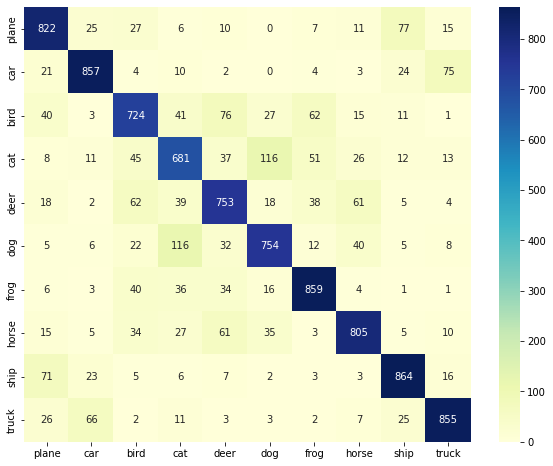

In [19]:
_, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(heatmap, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

# GoogLeNet

In [ ]:
model_googlenet=models.googlenet(pretrained=True)
model_googlenet

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [ ]:
for param in model_googlenet.parameters():
  param.requires_grad=False

In [ ]:
model_googlenet.fc=nn.Sequential(
     nn.Linear(in_features=1024, out_features=256, bias=True),
     nn.ReLU(inplace=True),
     nn.Dropout(p=0.5, inplace=False),
     nn.Linear(in_features=256, out_features=10, bias=True),
)

In [ ]:
model_googlenet=model_googlenet.cuda()

In [ ]:
optimizerG=opt.Adam(model_googlenet.fc.parameters(),lr=0.0005)

In [ ]:
epochs = 5

In [ ]:
loss_list = [] #draw
accu_list = [] #draw

for epoch in range(1, epochs+1):
  total_loss=0.0
  total_correct=0

  batch_num=0 #draw
  for batch, (images,labels) in enumerate(train_loader2,1):#從1開始
    images=Variable(images.cuda())
    labels=Variable(labels.cuda())
    y_pred=model_googlenet(images)
    _,pred=torch.max(y_pred,1)
    optimizerG.zero_grad()
    loss=loss_fn(y_pred,labels)
    loss.backward()
    optimizerG.step()
    total_loss+=loss.data
    total_correct+=torch.sum(pred==labels.data)
    if batch%100==0:
      print("epoch:%d, batch:%d, loss:%.4f, accuracy:%.4f"%(epoch,batch,(total_loss/batch),(total_correct/batch)))
      loss_list.append(total_loss/batch) #draw
      accu_list.append(total_correct/batch) #draw
      batch_num+=1 #draw

epoch:1, batch:100, loss:1.5651, accuracy:51.7700
epoch:1, batch:200, loss:1.2645, accuracy:60.2500
epoch:1, batch:300, loss:1.1199, accuracy:64.3933
epoch:1, batch:400, loss:1.0414, accuracy:66.4625
epoch:1, batch:500, loss:0.9868, accuracy:67.9020
epoch:2, batch:100, loss:0.7489, accuracy:74.8500
epoch:2, batch:200, loss:0.7392, accuracy:74.8650
epoch:2, batch:300, loss:0.7312, accuracy:75.1600
epoch:2, batch:400, loss:0.7290, accuracy:75.2850
epoch:2, batch:500, loss:0.7272, accuracy:75.2520
epoch:3, batch:100, loss:0.6879, accuracy:76.8100
epoch:3, batch:200, loss:0.6836, accuracy:76.9800
epoch:3, batch:300, loss:0.6807, accuracy:76.9567
epoch:3, batch:400, loss:0.6838, accuracy:76.7200
epoch:3, batch:500, loss:0.6897, accuracy:76.5020
epoch:4, batch:100, loss:0.6692, accuracy:77.4000
epoch:4, batch:200, loss:0.6689, accuracy:77.3500
epoch:4, batch:300, loss:0.6654, accuracy:77.2867
epoch:4, batch:400, loss:0.6635, accuracy:77.3875
epoch:4, batch:500, loss:0.6631, accuracy:77.3480


In [ ]:
loss_list = [] #draw
accu_list = [] #draw

for epoch in range(1, epochs+1):
  total_loss=0.0
  total_correct=0

  batch_num=0 #draw
  for batch, (images,labels) in enumerate(train_loader,1):#從1開始
    images=Variable(images.cuda())
    labels=Variable(labels.cuda())
    y_pred=model_googlenet(images)
    _,pred=torch.max(y_pred,1)
    optimizerG.zero_grad()
    loss=loss_fn(y_pred,labels)
    loss.backward()
    optimizerG.step()
    total_loss+=loss.data
    total_correct+=torch.sum(pred==labels.data)
    if batch%100==0:
      print("epoch:%d, batch:%d, loss:%.4f, accuracy:%.4f"%(epoch,batch,(total_loss/batch),(total_correct/batch)))
      loss_list.append(total_loss/batch) #draw
      accu_list.append(total_correct/batch) #draw
      batch_num+=1 #draw

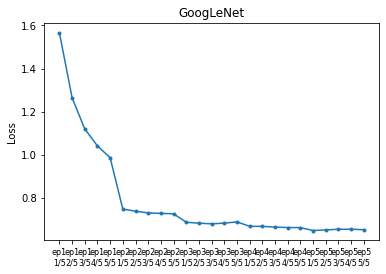

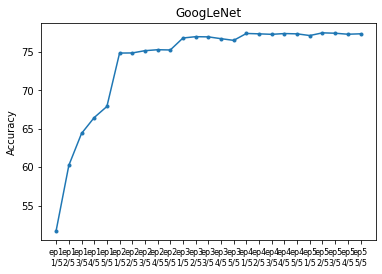

In [ ]:
#如果圖畫出來很醜可以再自己調
def draw_googlenet(num_list, epochs, batch_num, y_label):
  #num_list = [i.cpu() for i in num_list]
  x = range(1, len(num_list)+1)
  plt.plot(x, num_list, '.-')
  labels = ['ep'+str(e)+'\n'+str(b)+'/'+str(batch_num) for e in range(1, epochs+1) for b in range(1, batch_num+1)]
  plt.xticks(ticks=x, labels=labels, rotation=0, fontsize=8)
  plt.ylabel(y_label)
  plt.title("GoogLeNet")
  #plt.xlabel()
  #plt.savefig(file_name)
  plt.show()

loss_list = [i.cpu() for i in loss_list]
draw_googlenet(loss_list, epochs, batch_num, 'Loss')

accu_list = [i.cpu() for i in accu_list]
draw_googlenet(accu_list, epochs, batch_num, 'Accuracy')

In [ ]:
heatmap = pd.DataFrame(data=0, index=classes, columns=classes) #heatmap

total_loss=0.0
total_correct=0 
for batch, (images,labels) in enumerate(test_loader,1):#從1開始
    images=Variable(images.cuda())
    labels=Variable(labels.cuda())
    y_pred=model_googlenet(images)
    _,pred=torch.max(y_pred,1)
    loss=loss_fn(y_pred,labels)
    loss.backward()
    total_loss+=loss.data
    total_correct+=torch.sum(pred==labels.data)

    for i in range(BATCH_SIZE): #heatmap
      true_label = labels[i].item()
      pred_label = pred[i].item()
      heatmap.iloc[true_label, pred_label] += 1

print("loss:%.4f, accuracy:%.4f"%((total_loss/batch),(total_correct/batch)))

loss:0.6854, accuracy:76.3900


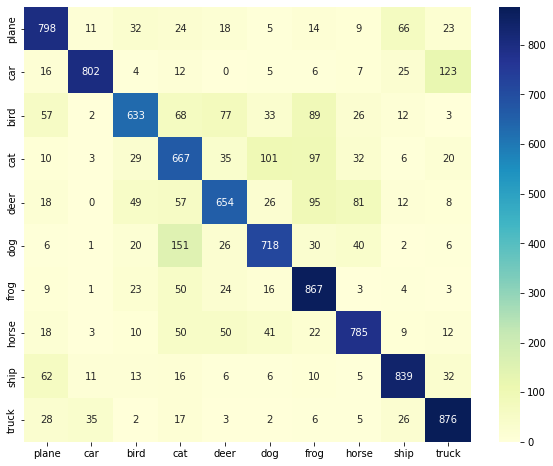

In [ ]:
_, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(heatmap, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

# Ensemble Model

In [ ]:
model_vgg16=models.vgg16(weights="DEFAULT")
model_resnet50=models.resnet50(weights="DEFAULT")
model_googlenet=models.googlenet(weights="DEFAULT")

In [ ]:
for param in model_vgg16.parameters():
  param.requires_grad=False
for param in model_resnet50.parameters():
  param.requires_grad=False
for param in model_googlenet.parameters():
  param.requires_grad=False

In [ ]:
model_vgg16.classifier=nn.Sequential(
     nn.Linear(in_features=25088, out_features=4096, bias=True),
     nn.ReLU(inplace=True),
     nn.Dropout(p=0.5, inplace=False),
     nn.Linear(in_features=4096, out_features=4096, bias=True),
     nn.ReLU(inplace=True),
     nn.Dropout(p=0.5, inplace=False),
     nn.Linear(in_features=4096, out_features=10, bias=True),
)
model_resnet50.fc=nn.Sequential(
     nn.Linear(in_features=2048, out_features=1024, bias=True),
     nn.ReLU(inplace=True),
     nn.Dropout(p=0.5, inplace=False),
     nn.Linear(in_features=1024, out_features=256, bias=True),
     nn.ReLU(inplace=True),
     nn.Dropout(p=0.5, inplace=False),
     nn.Linear(in_features=256, out_features=10, bias=True),
)
model_googlenet.fc=nn.Sequential(
     nn.Linear(in_features=1024, out_features=256, bias=True),
     nn.ReLU(inplace=True),
     nn.Dropout(p=0.5, inplace=False),
     nn.Linear(in_features=256, out_features=10, bias=True),
)

In [ ]:
#要嘗試的組合: 1)accuracy 2)1/3
wv = 1/3
wr = 1/3
wg = 1/3

In [ ]:
weight_vgg16 = wv/(wv+wr+wg)
weight_resnet50 = wr/(wv+wr+wg)
weight_googlenet = wg/(wv+wr+wg)

In [ ]:
model_vgg16=model_vgg16.cuda()
model_resnet50=model_resnet50.cuda()
model_googlenet=model_googlenet.cuda()

In [ ]:
optimizerV = opt.Adam(model_vgg16.classifier.parameters(), lr=1e-4)
lr_schedulerV = opt.lr_scheduler.ReduceLROnPlateau(optimizerV, factor=0.1, patience=3, verbose=True)

optimizerR=opt.Adam(model_resnet50.fc.parameters(),lr=0.0001)
optimizerG=opt.Adam(model_googlenet.fc.parameters(),lr=0.0005)

In [ ]:
epoch_n=10

In [ ]:
lossV_list = []
lossR_list = []
lossG_list = []
accu_list = []

for epoch in range(1, epoch_n+1):
  total_loss_vgg16 = 0.0
  total_loss_resnet50 = 0.0
  total_loss_googlenet = 0.0
  total_correct=0
  batch_num = 0

  #if epoch > ?: change optimizer
  #optimizerR=opt.Adam(model_resnet50.fc.parameters(),lr=0.0001)

  for batch, (images,labels) in enumerate(train_loader,1):
    model_vgg16.train()
    
    images=Variable(images.cuda())
    labels=Variable(labels.cuda())

    y_pred_vgg16=model_vgg16(images)
    y_pred_resnet50=model_resnet50(images)
    y_pred_googlenet=model_googlenet(images)

    y_pred_e=(weight_vgg16*y_pred_vgg16)+(weight_resnet50*y_pred_resnet50)+(weight_googlenet*y_pred_googlenet)
    _,pred=torch.max(y_pred_e,1)

    optimizerV.zero_grad()
    optimizerR.zero_grad()
    optimizerG.zero_grad()

    loss_vgg16=loss_fn(y_pred_vgg16,labels)
    loss_vgg16.backward()

    loss_resnet50=loss_fn(y_pred_resnet50,labels)
    loss_resnet50.backward()

    loss_googlenet=loss_fn(y_pred_googlenet,labels)
    loss_googlenet.backward()

    optimizerV.step()
    optimizerR.step()
    optimizerG.step()

    total_loss_vgg16 += loss_vgg16.data
    total_loss_resnet50 += loss_resnet50.data
    total_loss_googlenet += loss_googlenet.data

    total_correct+=torch.sum(pred==labels.data)
    if batch%100==0:
      print("epoch:%d, batch:%d, loss_vgg16:%.4f, loss_resnet50:%.4f, loss_googlenet:%.4f, accuracy:%.4f"
                            %(epoch,batch,(total_loss_vgg16/batch),(total_loss_resnet50/batch),(total_loss_googlenet/batch),(total_correct/batch)))
      lossV_list.append(total_loss_vgg16/batch)
      lossR_list.append(total_loss_resnet50/batch)
      lossG_list.append(total_loss_googlenet/batch)
      accu_list.append(total_correct/batch)
      batch_num += 1

      lr_schedulerV.step(total_loss_vgg16/batch)

In [ ]:
#如果圖畫出來很醜需要再微調
def draw(num_list, epochs, batch_num, y_label, title):
  x = range(len(num_list))
  plt.plot(x, num_list, '.-')

  labels = ['ep'+str(e)+'\n'+str(b)+'/'+str(batch_num) for e in range(1, epochs+1) for b in range(1, batch_num+1)]
  plt.xticks(ticks=x, labels=labels, rotation=0, fontsize=8) 

  plt.ylabel(y_label)
  plt.title(title)
  
  #plt.savefig(file_name)
  plt.show()

lossV_list = [i.cpu() for i in lossV_list]
draw(lossV_list, epoch_n, batch_num, 'Loss', 'VGG16')

accu_list = [i.cpu() for i in accu_list]
draw(accu_list, epoch_n, batch_num, 'Accuracy', 'Ensemble')

In [ ]:
heatmap = pd.DataFrame(data=0, index=classes, columns=classes)

total_loss_vgg16 = 0.0
total_loss_resnet50 = 0.0
total_loss_googlenet = 0.0
total_correct=0

for batch, (images,labels) in enumerate(test_loader,1):
  model_vgg16.eval()

  images=Variable(images.cuda())
  labels=Variable(labels.cuda())

  y_pred_vgg16=model_vgg16(images)
  y_pred_resnet50=model_resnet50(images)
  y_pred_googlenet=model_googlenet(images)

  y_pred_e=(weight_vgg16*y_pred_vgg16)+(weight_resnet50*y_pred_resnet50)+(weight_googlenet*y_pred_googlenet)
  _,pred=torch.max(y_pred_e,1)

  for i in range(BATCH_SIZE):
    true_label = labels[i].item()
    pred_label = pred[i].item()
    heatmap.iloc[true_label, pred_label] += 1


  loss_vgg16=loss_fn(y_pred_vgg16,labels)

  loss_resnet50=loss_fn(y_pred_resnet50,labels)

  loss_googlenet=loss_fn(y_pred_googlenet,labels)


  total_loss_vgg16 += loss_vgg16.data
  total_loss_resnet50 += loss_resnet50.data
  total_loss_googlenet += loss_googlenet.data

  total_correct+=torch.sum(pred==labels.data)
  if batch%100==0:
    print(" batch:%d, loss_vgg16:%.4f, loss_resnet50:%.4f, loss_googlenet:%.4f, accuracy:%.4f"
                          %(batch,(total_loss_vgg16/batch),(total_loss_resnet50/batch),(total_loss_googlenet/batch),(total_correct/batch)))

In [ ]:
_, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(heatmap, annot=True, fmt="d", cmap="YlGnBu")
plt.show()